# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [33]:
#Data
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
# Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
# Plot
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [34]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. 

El conjunto de datos trata sobre información del valor real de la vivienda (HMEQ) y sobre el desempeño para 5.960 prestamos recientes con garantia hipotecaria.

2. 

El target (BAD) es una variable binaria que indica si un solicitante finalmente incurrio en incumplimiento o en mora grave. Este resultado adverso se produjo en 1.189 casos (20%). Para cada solicitante, se registraron 12 variables de entrada.

3. 

Atributos

* `LOAN`    Monto de la solicitud del prestamo
* `MORTDUE` Monto adeudado de la hipoteca existente
* `VALUE`   Valor de la propiedad actual
* `YOJ` Años en el trabajo actual
* `DEROG` Número de informes negativos importantes
* `DELINQ` Número de líneas de crédito morosas
* `CLAGE`   Antigüedad de la línea comercial más antigua en meses
* `NINQ`    Número de líneas de crédito recientes
* `CLNO`    Número de líneas de crédito
* `DEBTINC` Relación deuda-ingresos

4. 

Los atributos que imaginamos mas determinantes son **MORTDUE,DELINQ,DEBTINC** ya que nos pueden determinar si el solicitante ya posee un estado crediticio actual negativo

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [35]:
clf = make_pipeline(StandardScaler(),
                   SGDClassifier(random_state=42))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [36]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))

Accuracy Score:  0.8194070080862533
Precision Score:  0.3783783783783784
F1 Score:  0.29473684210526313
Recall Score:  0.2413793103448276


Confusion matrix, without normalization
[[290  23]
 [ 44  14]]
Normalized confusion matrix
[[0.92651757 0.07348243]
 [0.75862069 0.24137931]]


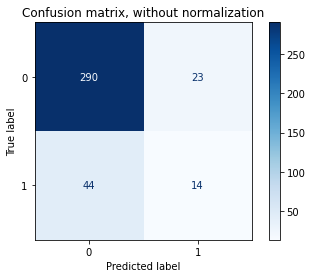

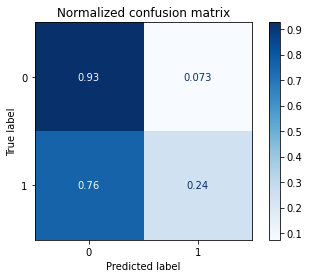

In [37]:
# Plot non-normalized confusion matrix
class_names = [0,1]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [38]:
# Selección de parámetros
param_grid = {
    'loss': ['perceptron','hinge','log','squared_loss','epsilon_insensitive'],
    'penalty' : ['l2', 'l1', 'none'],
    'alpha' : [0.0001, 0.001, 0.01, 0.1],
    'random_state': [42],
    'learning_rate': ['optimal','constant','invscaling'],
    'eta0': [0.0001, 0.001, 0.01, 0.1]
}

best_clf = make_pipeline(StandardScaler(), GridSearchCV(SGDClassifier(), param_grid, cv=5))
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

In [39]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))

Accuracy Score:  0.876010781671159
Precision Score:  0.7142857142857143
F1 Score:  0.46511627906976755
Recall Score:  0.3448275862068966


Confusion matrix, without normalization
[[305   8]
 [ 38  20]]
Normalized confusion matrix
[[0.97444089 0.02555911]
 [0.65517241 0.34482759]]


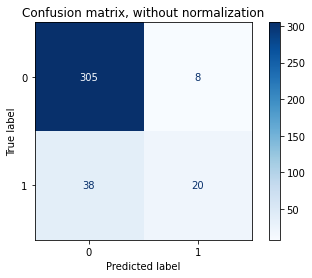

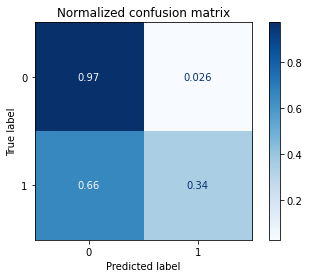

In [40]:
# Plot non-normalized confusion matrix
class_names = [0,1]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**Observaciones**

Vemos que al probar con distintos hiperparametros y usar los mejores, mejoraron nuestras metricas, principalmente bajaron la cantidad de falsos positivos y falsos negativos

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [41]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [42]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))

Accuracy Score:  0.8867924528301887
Precision Score:  0.6428571428571429
F1 Score:  0.6315789473684211
Recall Score:  0.6206896551724138


Confusion matrix, without normalization
[[293  20]
 [ 22  36]]
Normalized confusion matrix
[[0.93610224 0.06389776]
 [0.37931034 0.62068966]]


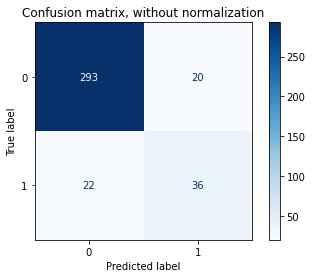

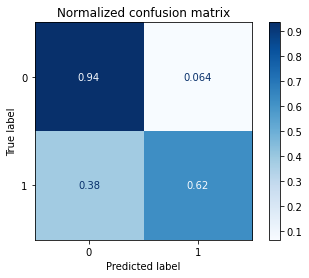

In [43]:
# Plot non-normalized confusion matrix
class_names = [0,1]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(tree, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [44]:
# Selección de parámetros
param_grid = {
    'criterion': ['entropy','gini'],
    'max_depth': [None,2,5,10,50,100],
    'min_samples_split' : [2,3,8,19]
}

best_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
best_tree.fit(X_train, y_train)

y_pred = best_tree.predict(X_test)

In [45]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))

Accuracy Score:  0.9029649595687331
Precision Score:  0.7619047619047619
F1 Score:  0.64
Recall Score:  0.5517241379310345


Confusion matrix, without normalization
[[303  10]
 [ 26  32]]
Normalized confusion matrix
[[0.96805112 0.03194888]
 [0.44827586 0.55172414]]


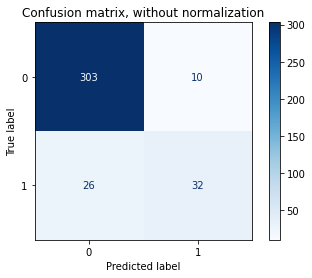

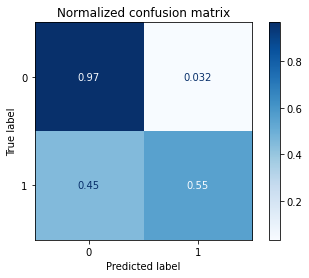

In [46]:
# Plot non-normalized confusion matrix
class_names = [0,1]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_tree, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**Conclusion**

Observamos una mejora en el modelo de arbol de decision con respecto al SGDClassifier, tuvimos mejores rendimientos en las metricas y bajaron los casos falsos positivos y falsos negativos. Tambien en ambos casos al buscar los mejores hiperpametros el modelo mejoro.